# DATA ANALYTICS LABORATORY DS165L Laboratory Exercise #3
#### Alliyah Rhayven A. Leviste | AM14 | 
##### September 7, 2024

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

Use sales-data sheet from assignment-data.xlsx and do the following tasks:

The Managing Director found that there is no clarity in sales-data. He likes to see clear visualization of data in various dimensions. He instructed his junior data scientist “Mr.Bean” to reshape the data.

##### Part-1:
Mr.Bean decided to display the product details produced by every company, along with supervisor detail. [ Hint: Use Pivot Table]. The expected output is as follows and create a customize plot using matplotlib.

In [81]:
part1 = pd.read_excel(r'C:\Users\Rhayven\Downloads\assignment-data.xlsx', 
        sheet_name='sales-data')

In [82]:
part1.head()

,Account-no,company-name,co-supervisor,supervisor,Product-detail,total-quantity,Price,Status
0,A300,Apple,Julia,Peter Prince,search engine,2,40000,Finished
1,A300,Apple,Julia,Peter Prince,Software,2,20000,Finished
2,A300,Apple,Julia,Peter Prince,printer,3,6000,yet to finish
3,A301,Google,Julia,Peter Prince,search engine,2,45000,declined
4,A302,Facebook,Mary Lim,Peter Prince,search engine,3,54000,won


In [83]:
part1.dtypes

Account-no        object
company-name      object
co-supervisor     object
supervisor        object
Product-detail    object
total-quantity     int64
Price              int64
Status            object
dtype: object

In [87]:
part1.pivot_table(values=['Price'],
index=['supervisor','company-name'],
columns='Product-detail',
aggfunc=[np.sum],
fill_value=0)


sum                               
                              Price                               
Product-detail              Monitor Software printer search engine
supervisor     company-name                                       
David Anderson Adobe              0        0       0         23000
               Infosys         4000        0       0         69000
               Microsoft          0        0    5000             0
               Oracle             0        0       0         90000
               SAP                0        0       0         75000
               XYZ company        0     9000    3000             0
Peter Prince   ABC ltd            0        0       0         25000
               Apple              0    20000    6000         40000
               Facebook           0        0       0         54000
               Google             0        0       0         45000
               HCL                0    12000    8000         43000

##### Part-2:
Mr.Bean decided to show the top 5companies that have the most 'total-quantity' ordered. Expected output is as follows.

In [40]:
df2 =pd.read_excel(r'C:\Users\Rhayven\Downloads\assignment-data.xlsx', 
        sheet_name='sales-data')

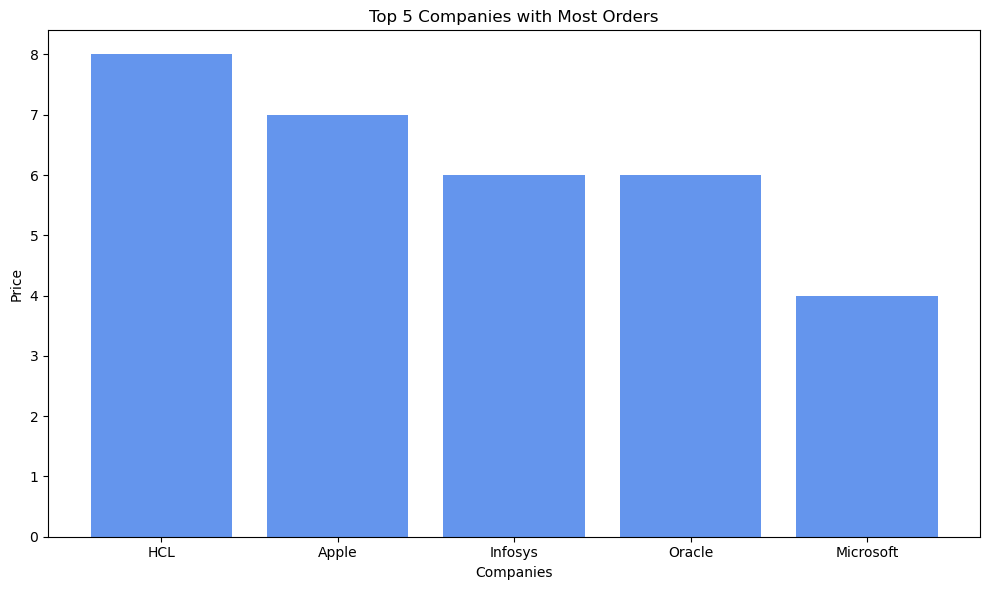

In [41]:
df2_grouped = df2.groupby('company-name').sum().reset_index()


df2_sorted = df2_grouped.sort_values(by='total-quantity', ascending=False).head()

plt.figure(figsize=(10, 6))
plt.bar(df2_sorted['company-name'], df2_sorted['total-quantity'], color='cornflowerblue')
plt.xlabel('Companies')
plt.ylabel('Price')
plt.title('Top 5 Companies with Most Orders')
plt.tight_layout()
plt.show()

##### Part-3:
Further, “Mr.Bean” has created a scatterplot showing total-quantity vs Price for 3 companies; Apple, HCL and Infosys. Expected output is as follows.

In [79]:
df = pd.read_excel(r'C:\Users\Rhayven\Downloads\assignment-data.xlsx', 
        sheet_name='sales-data')

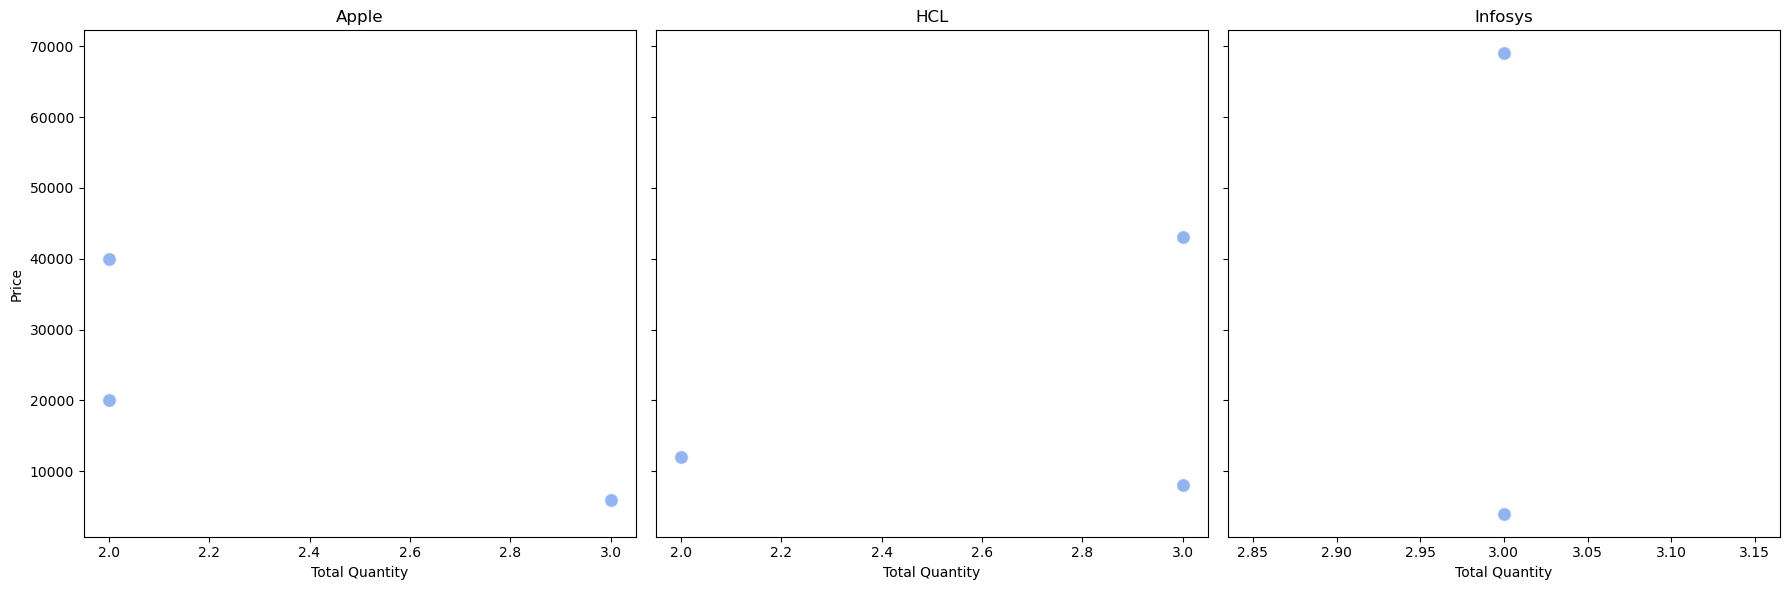

In [80]:
apple_data = df[df['company-name'] == 'Apple']
hcl_data = df[df['company-name'] == 'HCL']
infosys_data = df[df['company-name'] == 'Infosys']

# SUBPLOT
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

#APPLE
x_apple = apple_data['total-quantity']
y_apple = apple_data['Price']
axs[0].scatter(x_apple, y_apple, alpha=0.7, edgecolors='w', s=100, color='cornflowerblue')
axs[0].set_title('Apple')
axs[0].set_xlabel('Total Quantity')
axs[0].set_ylabel('Price')


#HCL
x_hcl = hcl_data['total-quantity']
y_hcl = hcl_data['Price']
axs[1].scatter(x_hcl, y_hcl, alpha=0.7, edgecolors='w', s=100, color='cornflowerblue')
axs[1].set_title('HCL')
axs[1].set_xlabel('Total Quantity')


#INFOSYS
x_infosys = infosys_data['total-quantity']
y_infosys = infosys_data['Price']
axs[2].scatter(x_infosys, y_infosys, alpha=0.7, edgecolors='w', s=100, color='cornflowerblue')
axs[2].set_title('Infosys')
axs[2].set_xlabel('Total Quantity')

for ax in axs:
    ax.grid(False)
plt.tight_layout()
plt.show()
